# Multiple linear Regresion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline
import urllib.request

In [2]:
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
filename='FuelConsuptionCo2.csv'
urllib.request.urlretrieve(url,filename)

('FuelConsuptionCo2.csv', <http.client.HTTPMessage at 0x225b7ab91f0>)

In [3]:
df=pd.read_csv("FuelConsuptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
new_df=df[["ENGINESIZE","CYLINDERS",'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Text(0, 0.5, 'Emission')

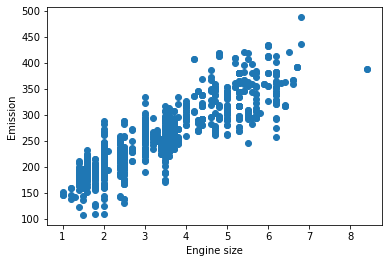

In [9]:
plt.scatter(new_df["ENGINESIZE"],new_df["CO2EMISSIONS"])
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [10]:
msk=np.random.rand(len(df))<.8
train=new_df[msk]
test=new_df[~msk]

Text(0, 0.5, 'Emission')

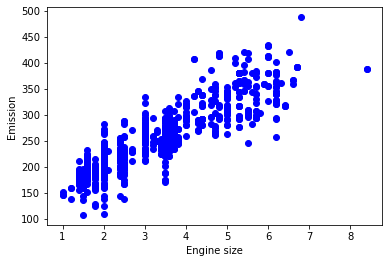

In [11]:
#80% DATA
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

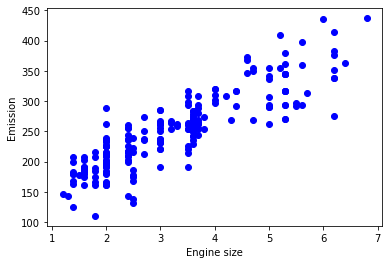

In [12]:
#20% DATA
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [13]:
from sklearn import linear_model

In [15]:
regr=linear_model.LinearRegression()

In [16]:
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)

LinearRegression()

In [18]:
print(f'Coeficientes : ',regr.coef_)
print(f'Intercept θ0: ',regr.intercept_)

Coeficientes :  [[9.72142268 7.98878578 9.84306364]]
Intercept θ0:  [63.80168262]


## OLS= Ordinary Least Squares

metodo para estimar los parametros desconocidos en un modelo de regresión lineal, elige los parametros de una funcion lineal de un conjunto de variables explicativas minimizando la suma de los cuadrados de las diferencias entre la variable objetivo depentiente y laas previstas por la funcion lineal.

## Prediction

In [24]:
y_hat=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 609.83
Variance score: 0.84


## New Challenge create new multiple regression model

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print(f'Intercept θ0: ',regr.intercept_)

Coefficients:  [[-11.2152258   18.40208481 -13.11129945  33.66727082]]
Intercept θ0:  [78.58632924]


In [31]:
y_hat=regr.predict(test[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 609.08
Variance score: 0.84
